In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!kaggle datasets download -d faviovaz/marketing-ab-testing

Dataset URL: https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing
License(s): CC0-1.0
marketing-ab-testing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile

with zipfile.ZipFile("marketing-ab-testing.zip") as file:
    file.extractall()

In [5]:
df = pd.read_csv("marketing_AB.csv")

In [6]:
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [8]:
df.describe()

,Unnamed: 0,user id,total ads,most ads hour
count,588101.000000,5.881010e+05,588101.000000,588101.000000
mean,294050.000000,1.310692e+06,24.820876,14.469061
std,169770.279668,2.022260e+05,43.715181,4.834634
min,0.000000,9.000000e+05,1.000000,0.000000
25%,147025.000000,1.143190e+06,4.000000,11.000000
50%,294050.000000,1.313725e+06,13.000000,14.000000
75%,441075.000000,1.484088e+06,27.000000,18.000000
max,588100.000000,1.654483e+06,2065.000000,23.000000


In [9]:
df = df.drop(['Unnamed: 0', 'user id'], axis=1)

In [10]:
df.rename(columns = lambda x: x.strip().replace(" ", "_"), inplace = True)
df.head()

,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14


In [11]:
df.drop_duplicates()
df.shape

(588101, 5)

In [12]:
def value_count(column):
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column, palette='tab10')
    plt.title(f'Value Count - {column}')
    plt.show()
    

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\1236244278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = column, palette='tab10')


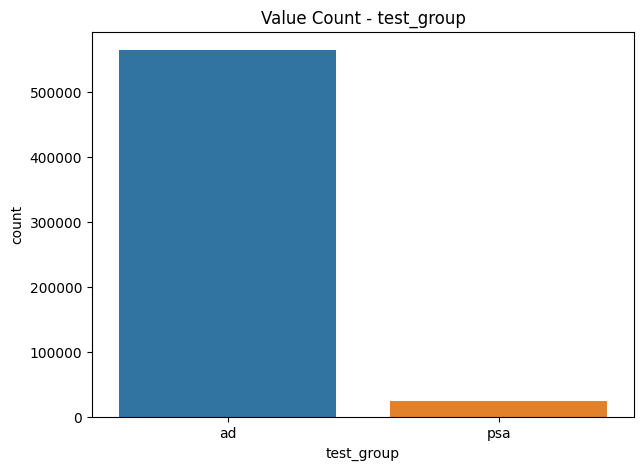

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\1236244278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = column, palette='tab10')


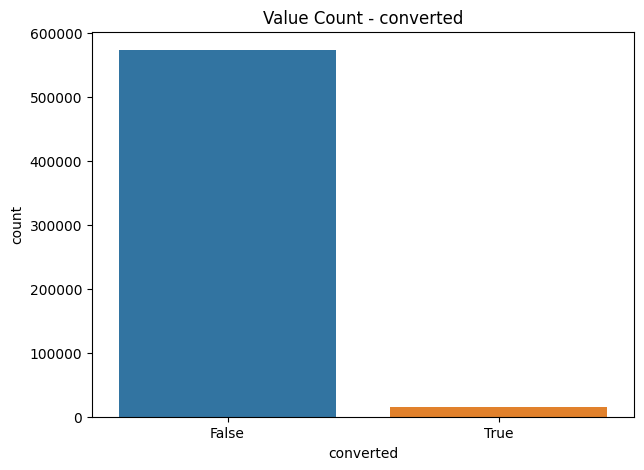

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\1236244278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = column, palette='tab10')


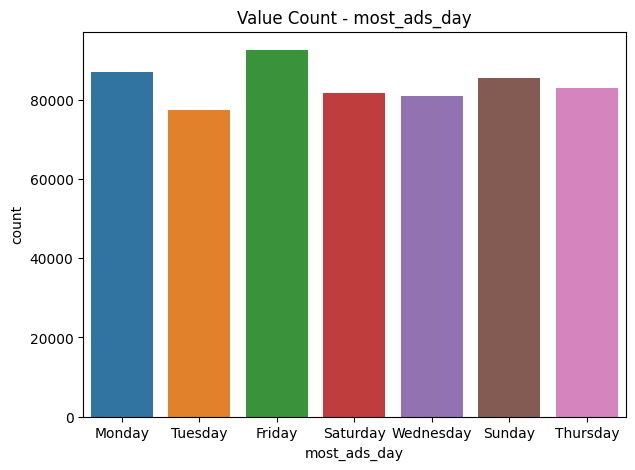

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\1236244278.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x = column, palette='tab10')


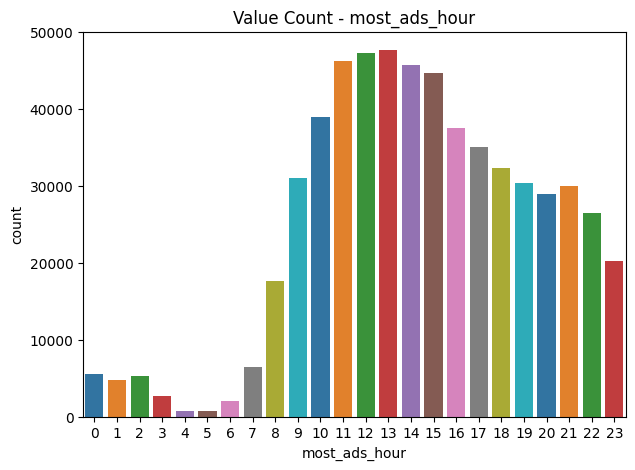

In [13]:
columns = df.columns[[0,1,3,4]]

for column in columns:
    value_count(column)
    

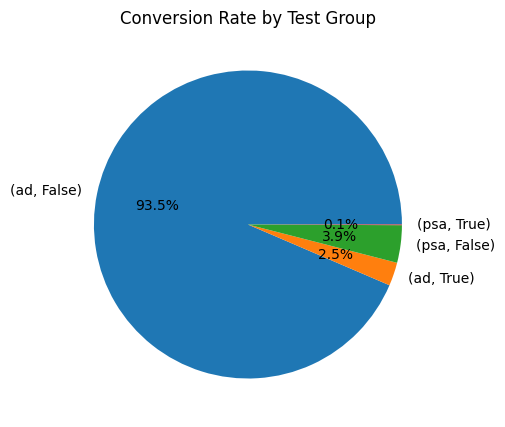

In [25]:
grouped = df.groupby('test_group')['converted'].value_counts()
grouped.plot.pie(figsize = (5, 5), autopct = '%1.1f%%')
plt.title('Conversion Rate by Test Group')
plt.ylabel('')
plt.show()


Конверсия по Тест группам

In [15]:
conversion_test = df.groupby('test_group')['converted'].mean()
conversion_test

test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\3784047972.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = conversion_test.index, y=conversion_test.values, palette='tab10')


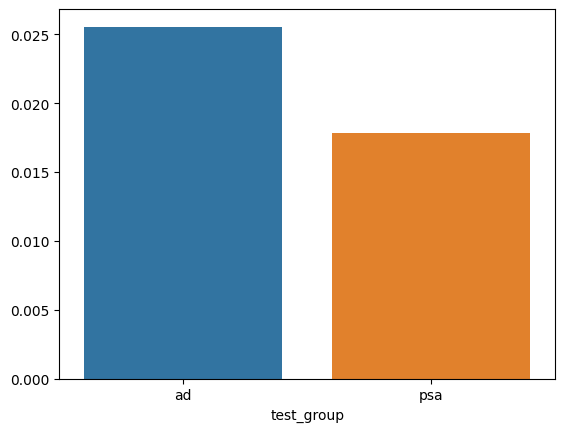

In [26]:
sns.barplot(x = conversion_test.index, y=conversion_test.values, palette='tab10')
plt.show()

Конверсия по дням

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\2560311867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_day.index, y=conversion_by_day.values, palette="tab10")


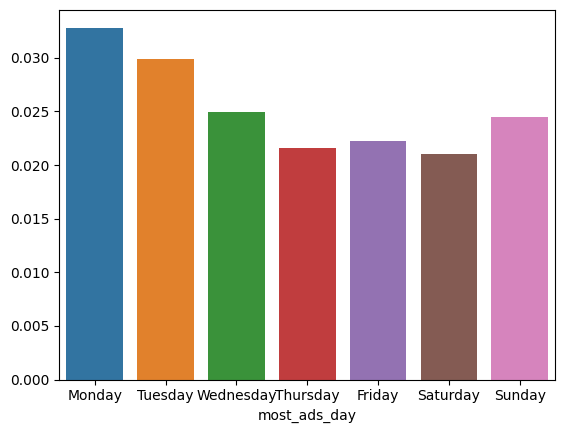

In [28]:
conversion_by_day = df.groupby('most_ads_day')['converted'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
sns.barplot(x=conversion_by_day.index, y=conversion_by_day.values, palette="tab10")
plt.show()


Пн и Вт - наиболее успешнии дни для кампании

Конверсия по часам

C:\Users\honor\AppData\Local\Temp\ipykernel_20080\2288419676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_by_hour.index, y=conversion_by_hour.values, palette="tab10")


<Axes: xlabel='most_ads_hour'>

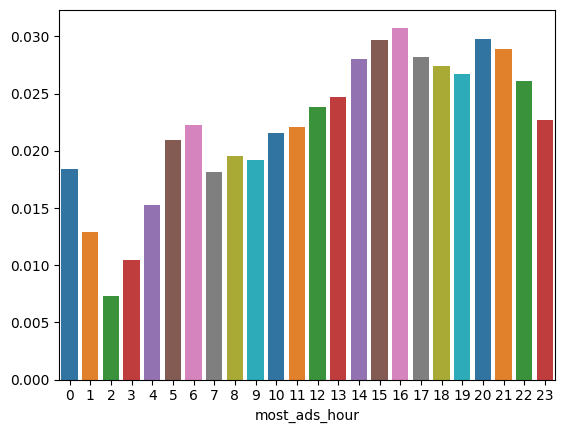

In [18]:
conversion_by_hour = df.groupby('most_ads_hour')['converted'].mean()
sns.barplot(x=conversion_by_hour.index, y=conversion_by_hour.values, palette="tab10")

Наиболее удачные кампании проходили с 14-16 

Проверки гипотез

$H_{0}: ad = psa$

$H_{1}: ad \neq psa$

Test 1

In [19]:
conversion_counts = df.groupby('test_group')['converted'].sum()
sample_sizes = df['test_group'].value_counts()

print(f"Conversion Rates:{conversion_test}")
print(f"\nConversion Counts:{conversion_counts}")
print(f"\nSample Sizes: {sample_sizes}")

Conversion Rates:test_group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Conversion Counts:test_group
ad     14423
psa      420
Name: converted, dtype: int64

Sample Sizes: test_group
ad     564577
psa     23524
Name: count, dtype: int64


In [20]:
from statsmodels.stats.proportion import proportions_ztest

In [21]:
total_users = df['test_group'].value_counts()
z_stat, p_val = proportions_ztest(count = conversion_counts, nobs = total_users)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_val}")

Z-statistic: 7.3700781265454145
P-value: 1.7052807161559727e-13


При $\alpha = 0.05$  
$p<\alpha$ 

Есть основания отклонить нулевую гипотезу

Test 2

In [22]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['test_group'], df['converted'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")


Chi-square statistic: 54.005823883685245
P-value: 1.9989623063390075e-13


При $\alpha = 0.05$  
$p<\alpha$ 

Есть основания отклонить нулевую гипотезу

Test 3

In [23]:
from scipy.stats import ttest_ind

df['total_ads'] = pd.to_numeric(df['total_ads'], errors='coerce')

ads_group = df[df['test_group'] == 'ad']['total_ads']
psa_group = df[df['test_group'] == 'psa']['total_ads']

t_stat, p_val = ttest_ind(ads_group, psa_group, equal_var=False)  

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

T-statistic: 0.21799691449238462
P-value: 0.8274332524963


При $\alpha = 0.05$  
$p>\alpha$ 

Нет оснований отклонить нулевую гипотезу

Test 4

In [24]:
from scipy.stats import f_oneway

ad_group = df[df['test_group'] == 'ad']['total_ads']
psa_group = df[df['test_group'] == 'psa']['total_ads']

f_stat, p_val = f_oneway(ad_group, psa_group)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")


F-statistic: 0.045759626208427315
P-value: 0.8306134187285898


При $\alpha = 0.05$  
$p>\alpha$ 

Нет оснований отклонить нулевую гипотезу